# Data Exploration of the Statoil kaggle competition

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Load the Data

In [2]:
data_folder = Path("data")
train_file = data_folder / 'train.json'
test_file = data_folder / 'test.json'

train = pd.read_json(train_file) 
test = pd.read_json(test_file) 


In [3]:
train.tail()

band_1  \
1599  [-30.999878, -29.976866, -28.233906, -29.50732...   
1600  [-25.31155, -26.511555, -28.694487, -27.180115...   
1601  [-18.141895, -18.141844, -19.01737, -19.701599...   
1602  [-22.455633, -25.794661, -26.954567, -22.83354...   
1603  [-19.909191, -20.678406, -20.208834, -18.42441...   

                                                 band_2        id inc_angle  \
1599  [-27.847719, -28.233864, -24.712077999999998, ...  04e11240        na   
1600  [-29.563713, -28.290375, -26.839405, -28.29046...  c7d6f6f8        na   
1601  [-25.305355, -29.387701, -28.963863, -26.16023...  bba1a0f1        na   
1602  [-26.070356, -22.093737, -21.577662, -24.53376...  7f66bb44        na   
1603  [-24.44487, -24.956001, -27.722103, -26.078417...  9d8f326c        na   

      is_iceberg  
1599           0  
1600           0  
1601           0  
1602           0  
1603           0

In [4]:
test.head()

band_1  \
0  [-15.863251, -15.201077, -17.887735, -19.17248...   
1  [-26.058969497680664, -26.058969497680664, -26...   
2  [-14.14109992980957, -15.064241409301758, -17....   
3  [-12.167478, -13.706167, -16.54837, -13.572674...   
4  [-23.37459373474121, -26.02718162536621, -28.1...   

                                              band_2        id  inc_angle  
0  [-21.629612, -21.142353, -23.908337, -28.34524...  5941774d  34.966400  
1  [-25.754207611083984, -25.754207611083984, -25...  4023181e  32.615072  
2  [-14.74563980102539, -14.590410232543945, -14....  b20200e4  37.505433  
3  [-24.32222, -26.375538, -24.096739, -23.8769, ...  e7f018bb  34.473900  
4  [-25.72234344482422, -27.011577606201172, -23....  4371c8c3  43.918874

In [5]:
iceberg_fraction = round(np.mean(train['is_iceberg']),3)
print( f'The target label has {iceberg_fraction*100}% iceberg labels.')

The target label has 46.9% iceberg labels.


In [6]:
train.count()

band_1        1604
band_2        1604
id            1604
inc_angle     1604
is_iceberg    1604
dtype: int64

In [7]:
test.count()

band_1       8424
band_2       8424
id           8424
inc_angle    8424
dtype: int64

In [8]:
train['inc_angle'].describe()

count     1604
unique     879
top         na
freq       133
Name: inc_angle, dtype: object

In [9]:
print (f'The "inc_angle" has {round(133/1604*100,2)}% of data missing.')

The "inc_angle" has 8.29% of data missing.


Remove the missing `inc_angle` data, and replace it with `0`

In [10]:
train['inc_angle'].replace('na',0,inplace=True)

## loading summary
- The training set has 1604 data point and 5 features (`band_1`,`band_2`,`id`,`inc_angle`,`is_iceberg`)
- The training `inc_angle` has 133 points missing (8.29%). -> Replaced with `0`
- The test set has 8424 data point and 4 features (`band_1`,`band_2`,`id`,`inc_angle`)
- The `inc_angle` feature is complete in the testing data



# Calculate statistical moments for the image bands

In [11]:
from scipy.stats import skew,kurtosis

train['band_1_mean'] = np.array([np.mean(x) for x in train['band_1']])
train['band_1_var'] = np.array([np.var(x) for x in train['band_1']])
train['band_1_skew'] = np.array([skew(x) for x in train['band_1']])
train['band_1_kurt'] = np.array([kurtosis(x) for x in train['band_1']])
train['band_2_skew'] = np.array([skew(x) for x in train['band_2']])
train['band_2_kurt'] = np.array([kurtosis(x) for x in train['band_2']])
train['band_2_mean'] = np.array([np.mean(x) for x in train['band_2']])
train['band_2_var'] = np.array([np.var(x) for x in train['band_2']])

## Correlation between features and target

In [12]:
corr_matrix= train.corr()
corr_matrix

inc_angle  is_iceberg  band_1_mean  band_1_var  band_1_skew  \
inc_angle     1.000000    0.266283    -0.169532    0.043536     0.114518   
is_iceberg    0.266283    1.000000    -0.167138   -0.205328    -0.220688   
band_1_mean  -0.169532   -0.167138     1.000000    0.159763     0.113644   
band_1_var    0.043536   -0.205328     0.159763    1.000000     0.616313   
band_1_skew   0.114518   -0.220688     0.113644    0.616313     1.000000   
band_1_kurt   0.086221   -0.300356    -0.032549    0.297262     0.885597   
band_2_skew   0.013839   -0.381570     0.450127    0.699981     0.765219   
band_2_kurt  -0.015913   -0.448511     0.376177    0.548971     0.725012   
band_2_mean  -0.218802   -0.118842     0.743796    0.138239     0.153502   
band_2_var    0.040251   -0.310586     0.334604    0.840047     0.538627   

             band_1_kurt  band_2_skew  band_2_kurt  band_2_mean  band_2_var  
inc_angle       0.086221     0.013839    -0.015913    -0.218802    0.040251  
is_iceberg     -0.300356    -0.381570    -0.448511    -0.118842   -0.310586  
band_1_mean    -0.032549     0.450127     0.376177     0.743796    0.334604  
band_1_var      0.297262     0.699981     0.548971     0.138239    0.840047  
band_1_skew     0.885597     0.765219     0.725012     0.153502    0.538627  
band_1_kurt     1.000000     0.538645     0.604903     0.062185    0.249230  
band_2_skew     0.538645     1.000000     0.942647     0.303919    0.753159  
band_2_kurt     0.604903     0.942647     1.000000     0.245173    0.570874  
band_2_mean     0.062185     0.303919     0.245173     1.000000    0.251265  
band_2_var      0.249230     0.753159     0.570874     0.251265    1.000000

In [13]:
pd.DataFrame(corr_matrix['is_iceberg']).T

inc_angle  is_iceberg  band_1_mean  band_1_var  band_1_skew  \
is_iceberg   0.266283         1.0    -0.167138   -0.205328    -0.220688   

            band_1_kurt  band_2_skew  band_2_kurt  band_2_mean  band_2_var  
is_iceberg    -0.300356     -0.38157    -0.448511    -0.118842   -0.310586

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


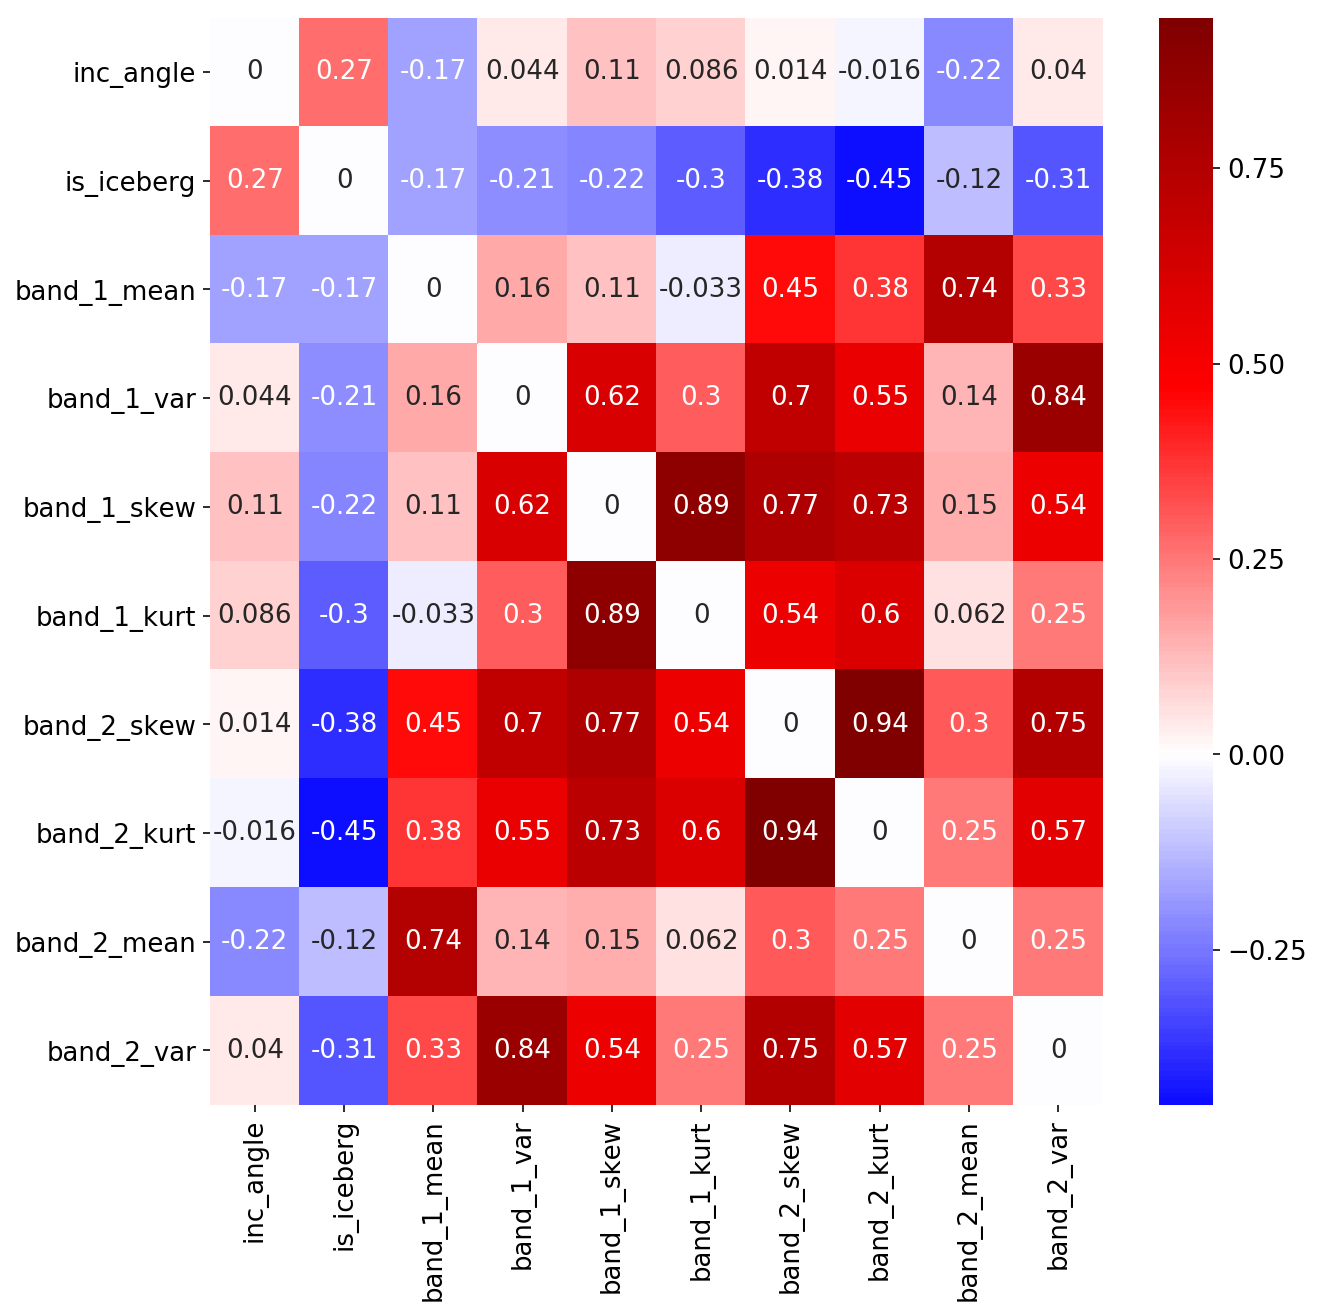

In [14]:
font = {'family':'normal',
       'weight':'normal',
       'size':13}
import matplotlib
matplotlib.rc('font', **font)

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix-np.identity(len(corr_matrix)),center=0,annot=True,cmap='seismic')

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


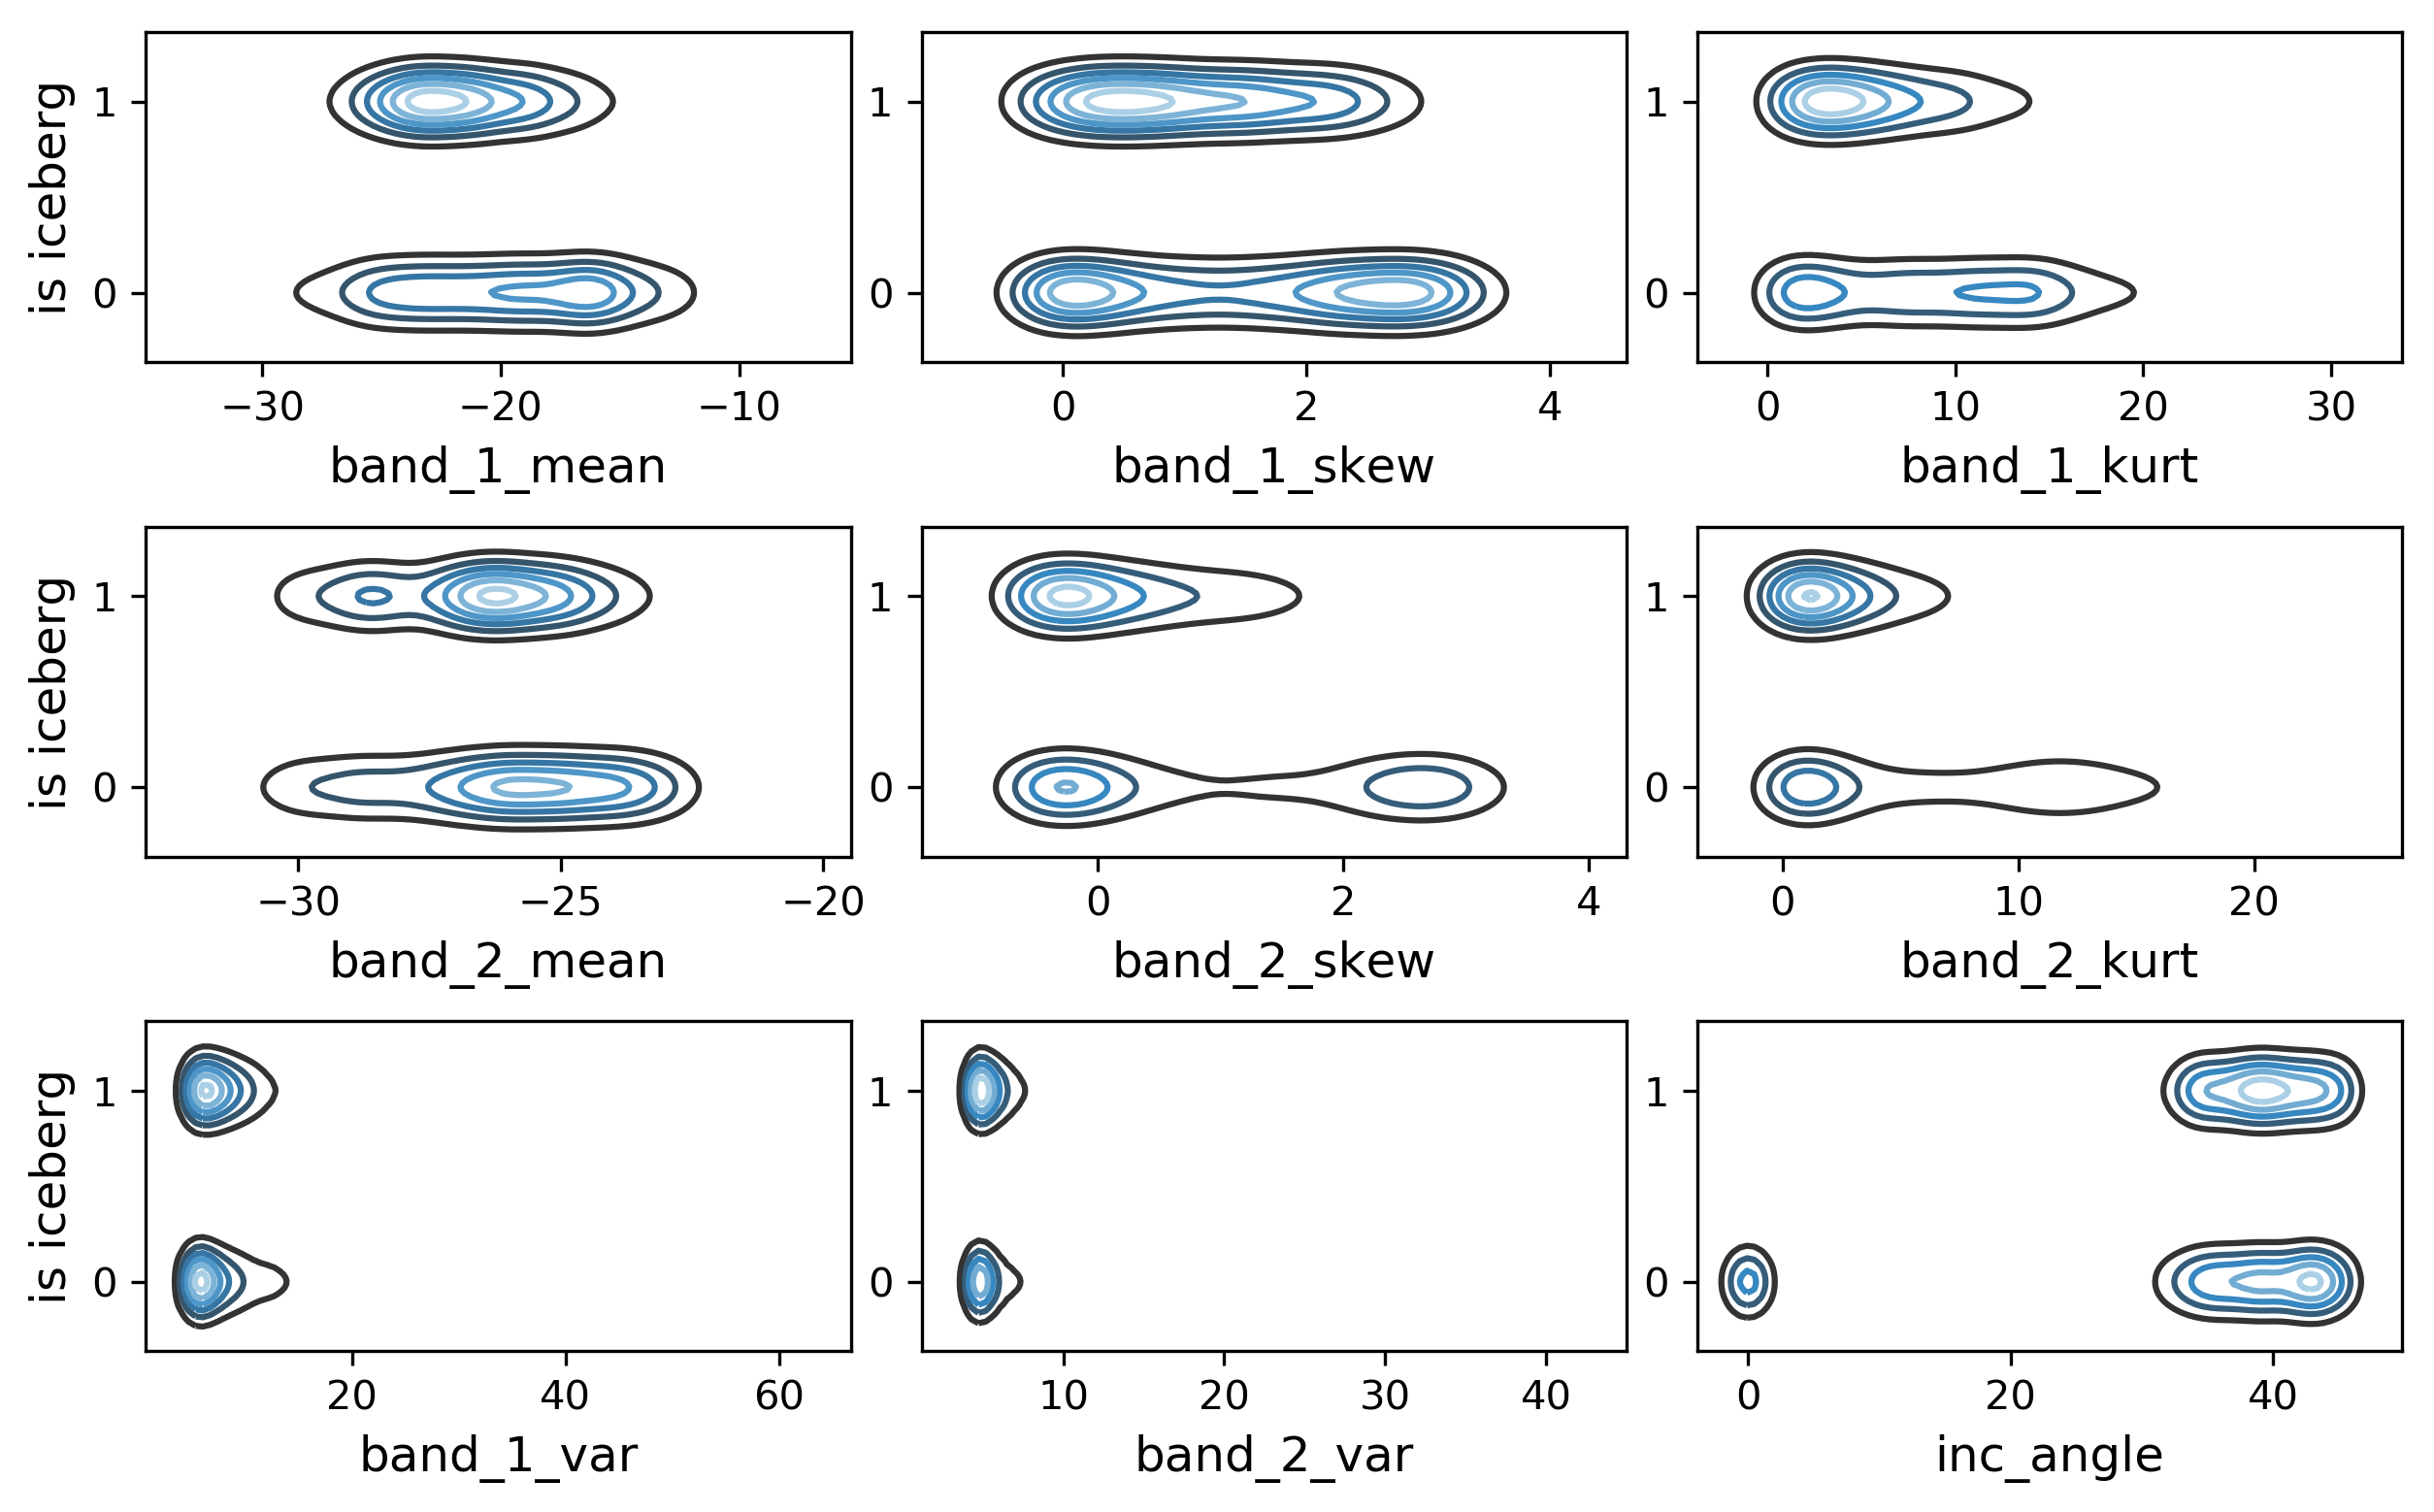

In [15]:
font = {'family':'normal',
       'weight':'normal',
       'size':10}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(10,6),dpi=150)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0.1, hspace=0.5)
for idx,col in enumerate(['band_1_mean', 'band_1_skew', 'band_1_kurt',
                          'band_2_mean','band_2_skew', 'band_2_kurt',
                          'band_1_var','band_2_var','inc_angle']):
    ax=plt.subplot(3, 3, idx+1)
    sns.kdeplot(data=train[col], data2=train['is_iceberg'],cmap="Blues_d", n_levels=6);
    ax.set_yticks([0,1])
    ax.set_ylabel('is iceberg',fontsize=12)
    x_lbl=ax.get_xlabel()
    ax.set_xlabel(x_lbl,fontsize=12)
    if not idx in [0,3,6]:
        ax.set_ylabel('')

plt.savefig('pair_plot.svg')

### inc_angle is_iceberg correlation 
All the data points that did not have an `inc_angle` feature are Icebergs. 
 - Is this a limitation in the data ? Or done on purpose ? 
 - Does this imply anything for real data?

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


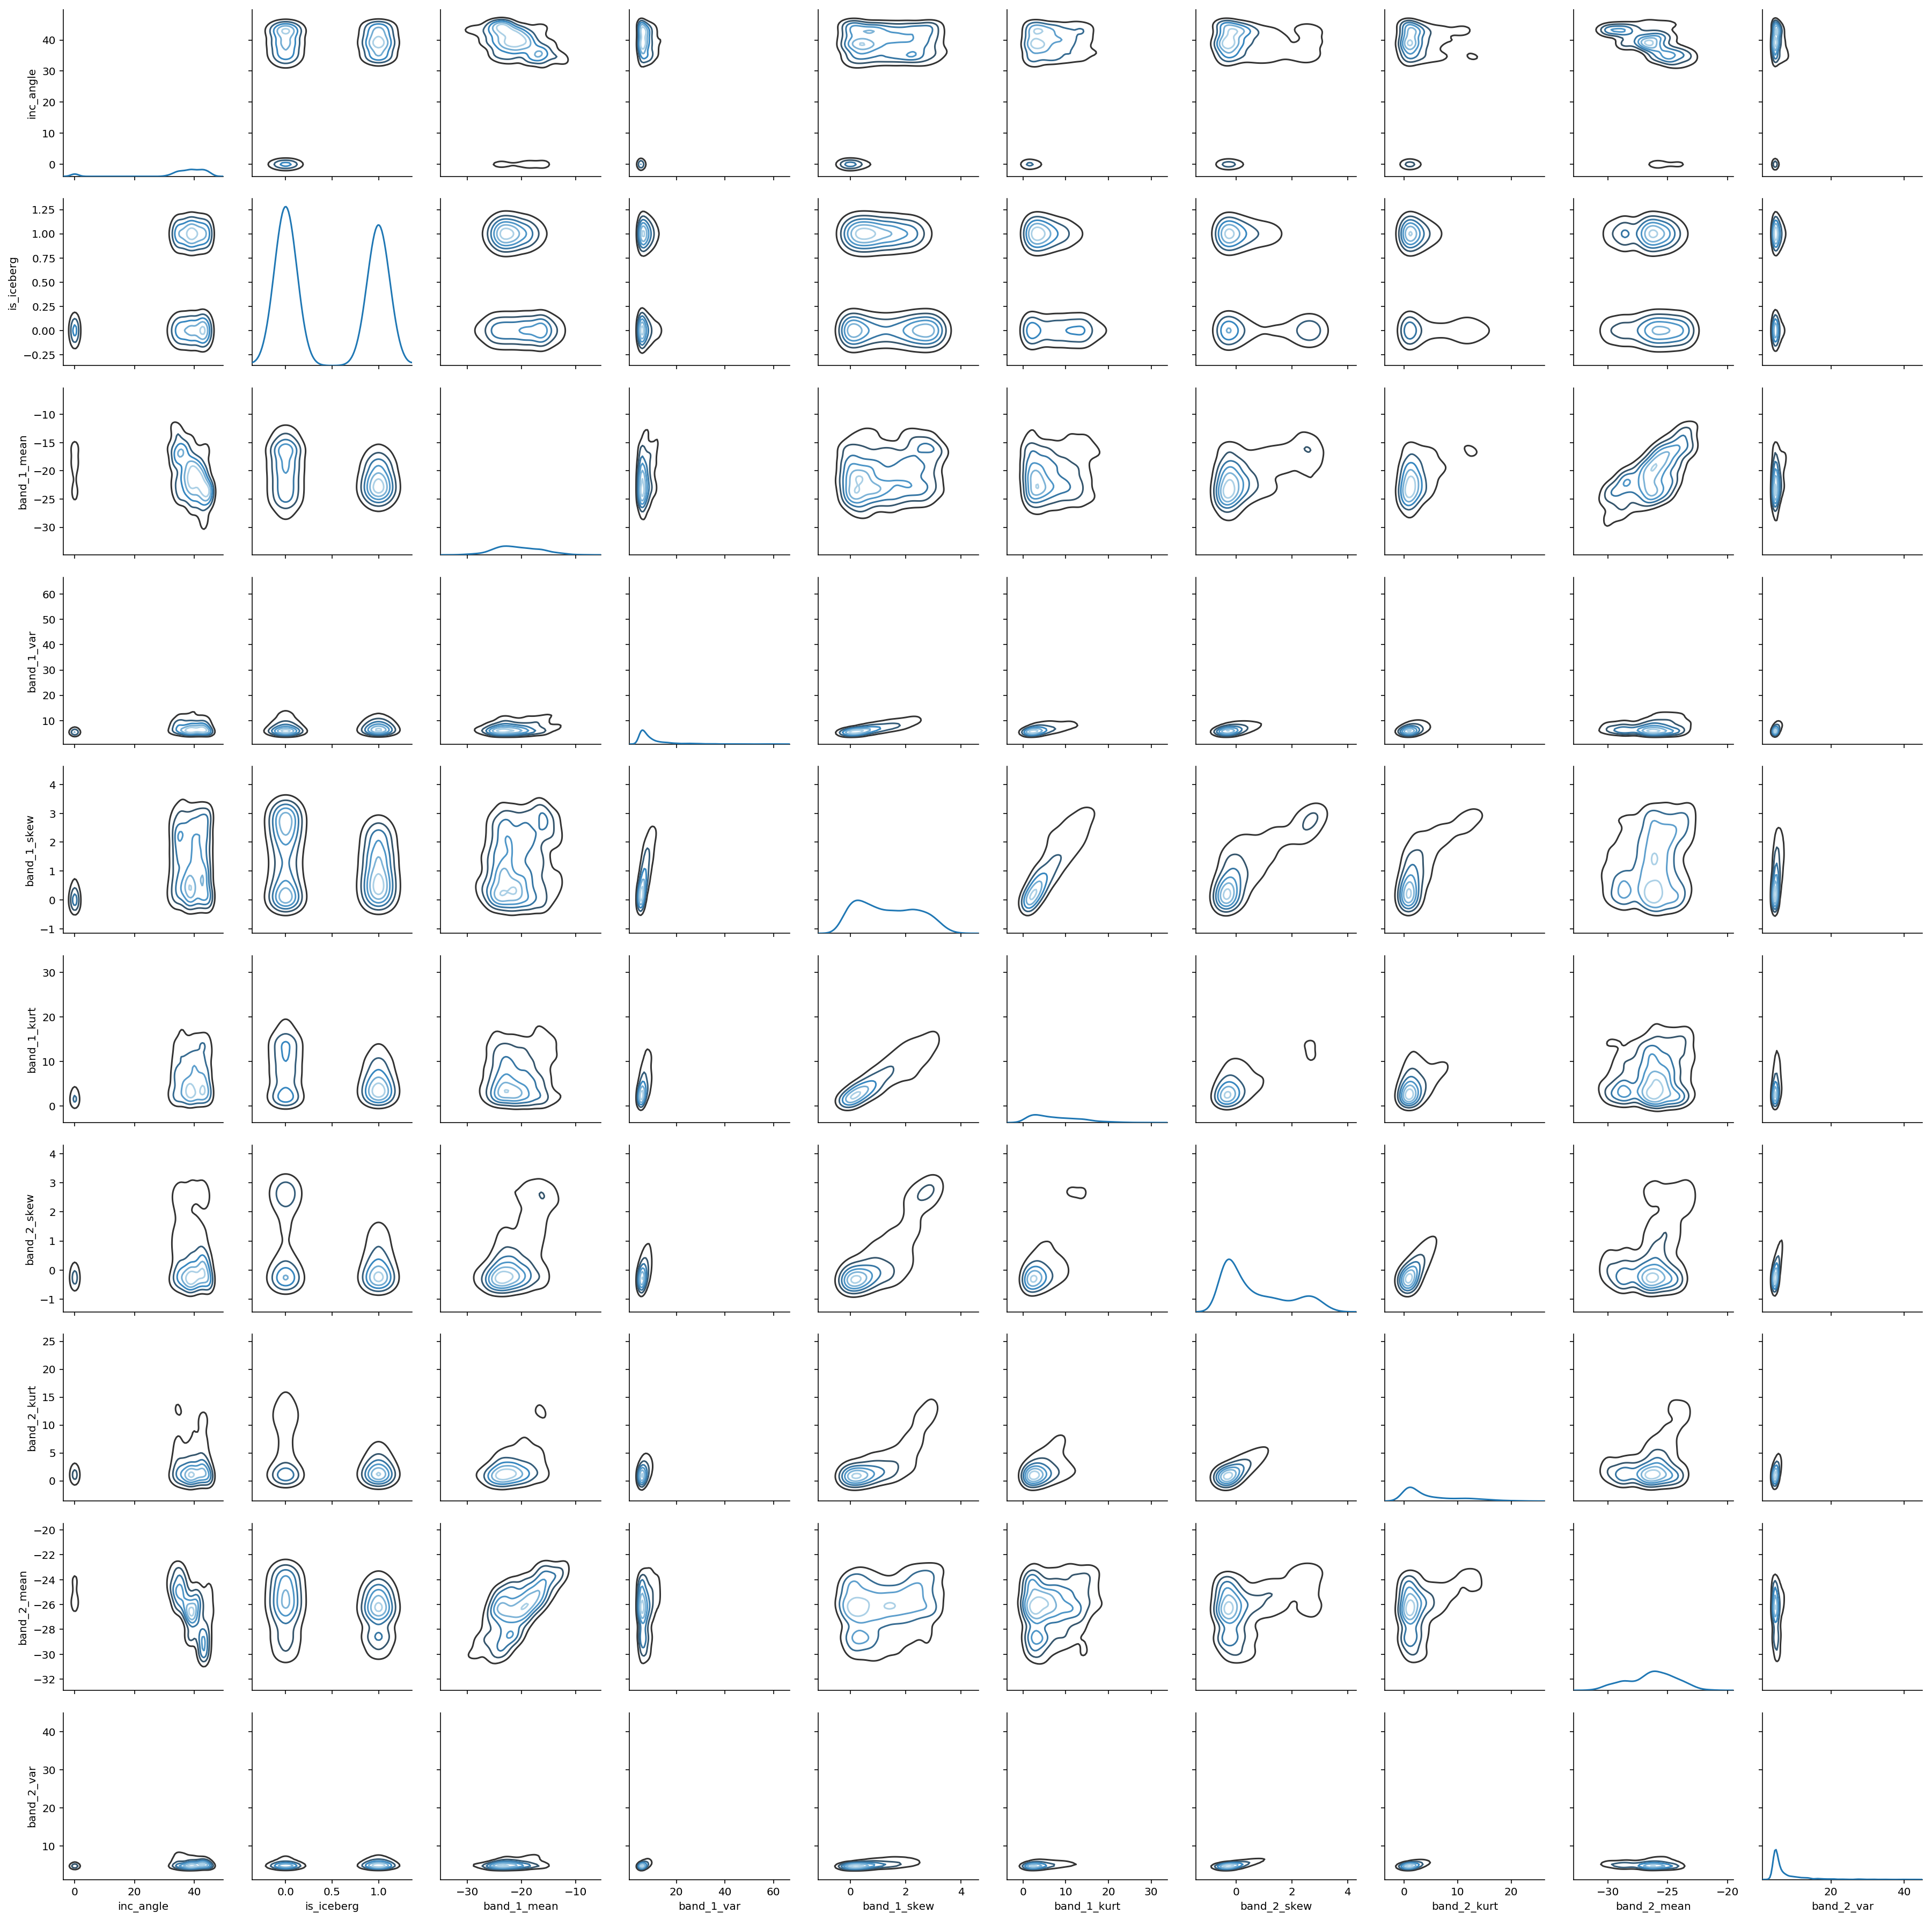

In [17]:
g = sns.PairGrid(train)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

### Visually ploting the channels

In [18]:
def plot_SAR(df,index):
    img1=np.array(df['band_1'][index]).reshape(75,75)
    img2=np.array(df['band_2'][index]).reshape(75,75)
    title = 'Iceberg' if df['is_iceberg'][index] == 1 else 'Ship'
    plt.figure(dpi=300,figsize=(4,2))
    plt.suptitle(title, fontsize=14)
    plt.subplot(131),plt.imshow(img1),plt.title('HH'),plt.axis('off')
    plt.subplot(132),plt.imshow(img2),plt.title('HV'),plt.axis('off')
    plt.subplot(133),plt.imshow(img2-img1),plt.title('HV-HH (phase)'),plt.axis('off')


    
    
def rescale(r):
    r=r-np.min(r)
    r/=np.max(r)
    r*=255
    return r
    
    
def plotSAR_rgb(df,index):
    r=np.array(df['band_1'][index])
    g=np.array(df['band_2'][index])
    b=np.array(df['band_2'][index])-np.array(df['band_1'][index])
    r=rescale(r).reshape(75,75)
    g=rescale(g).reshape(75,75)
    b=rescale(b).reshape(75,75)
    rgb=np.dstack([r,g,b])  
    plt.imshow(rgb)
    return rgb

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


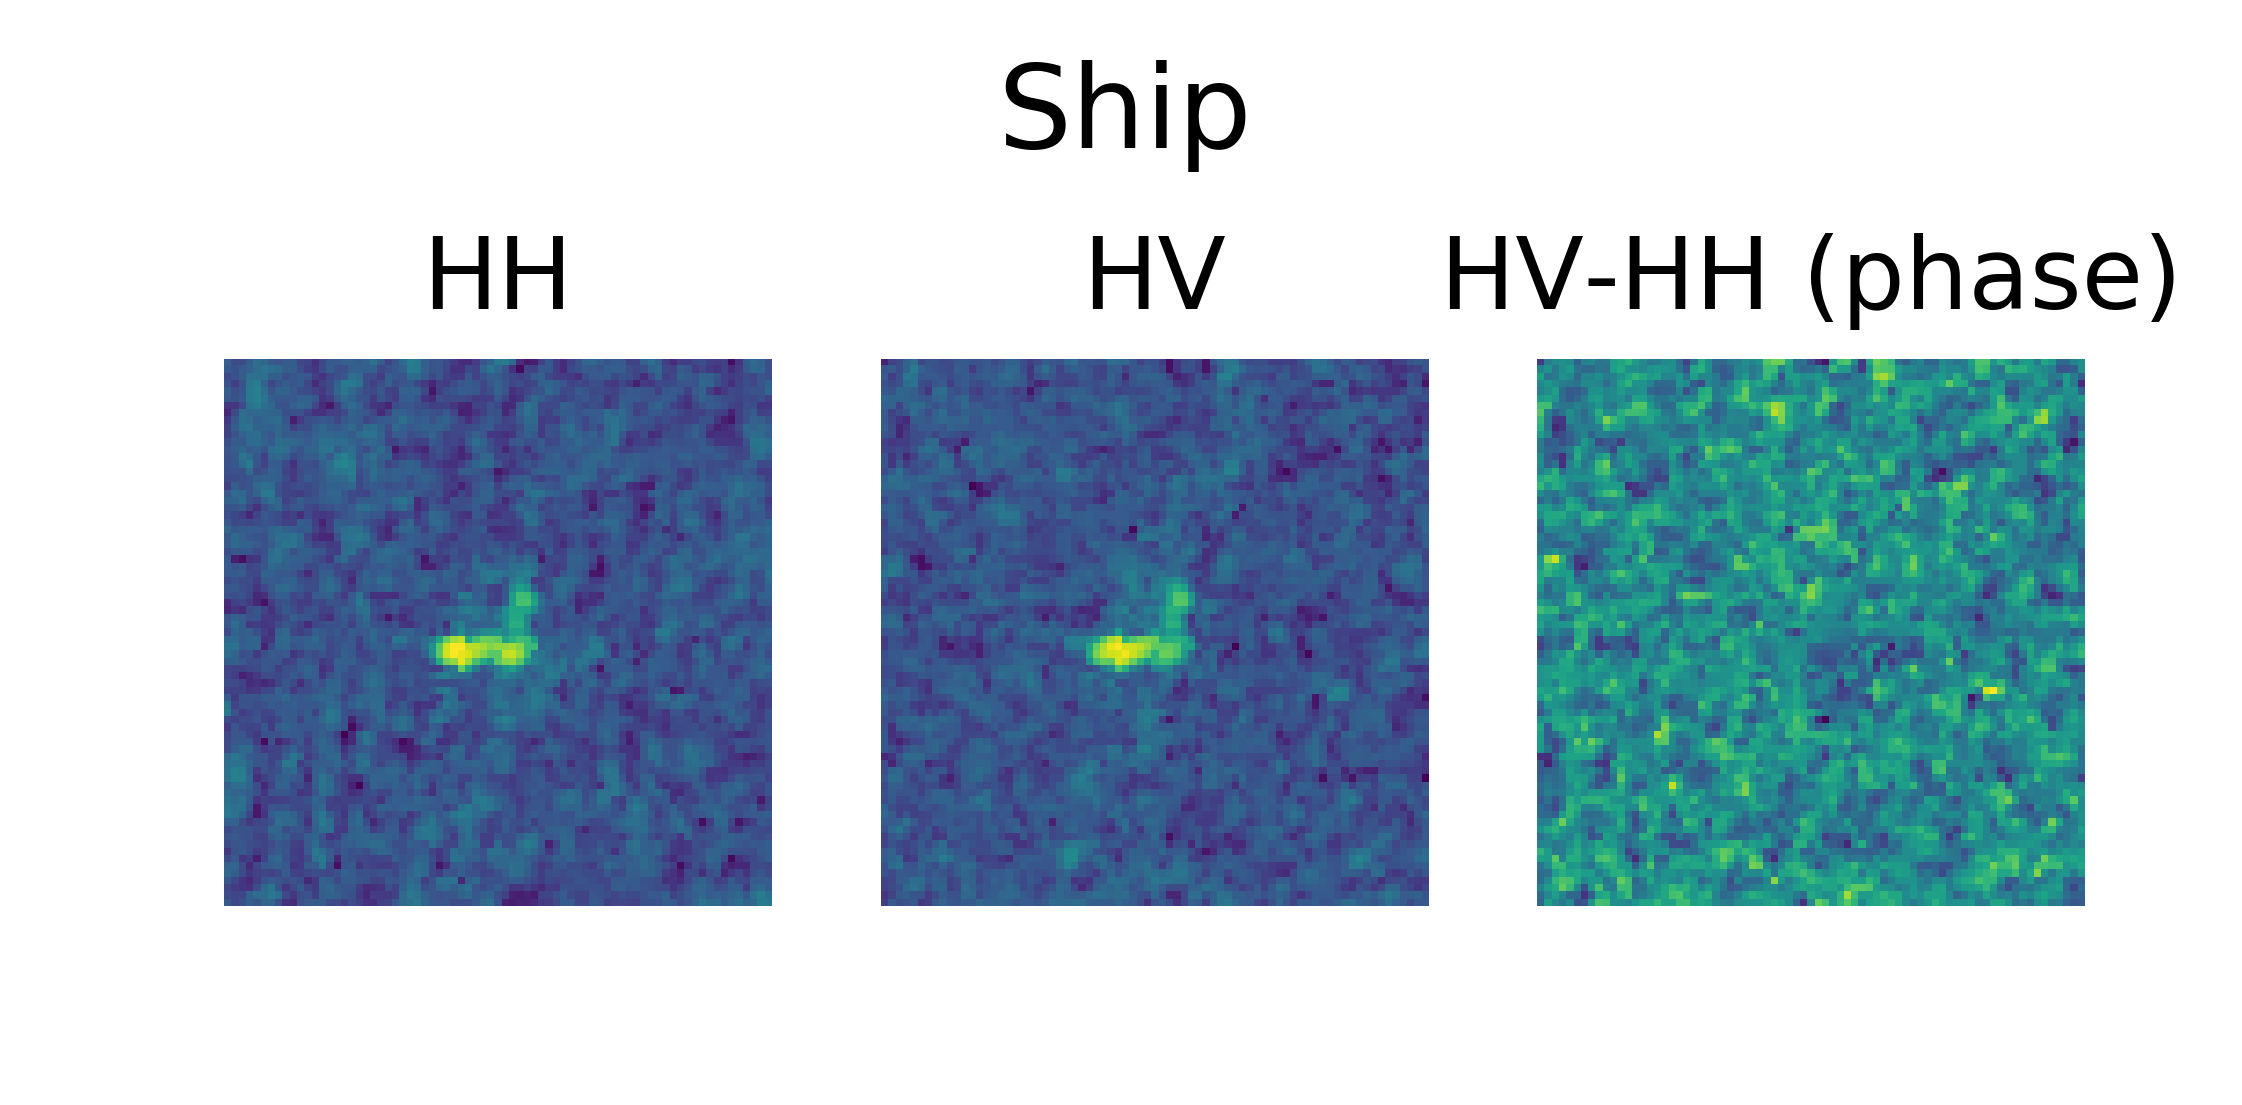

In [19]:
plot_SAR(train,1)

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


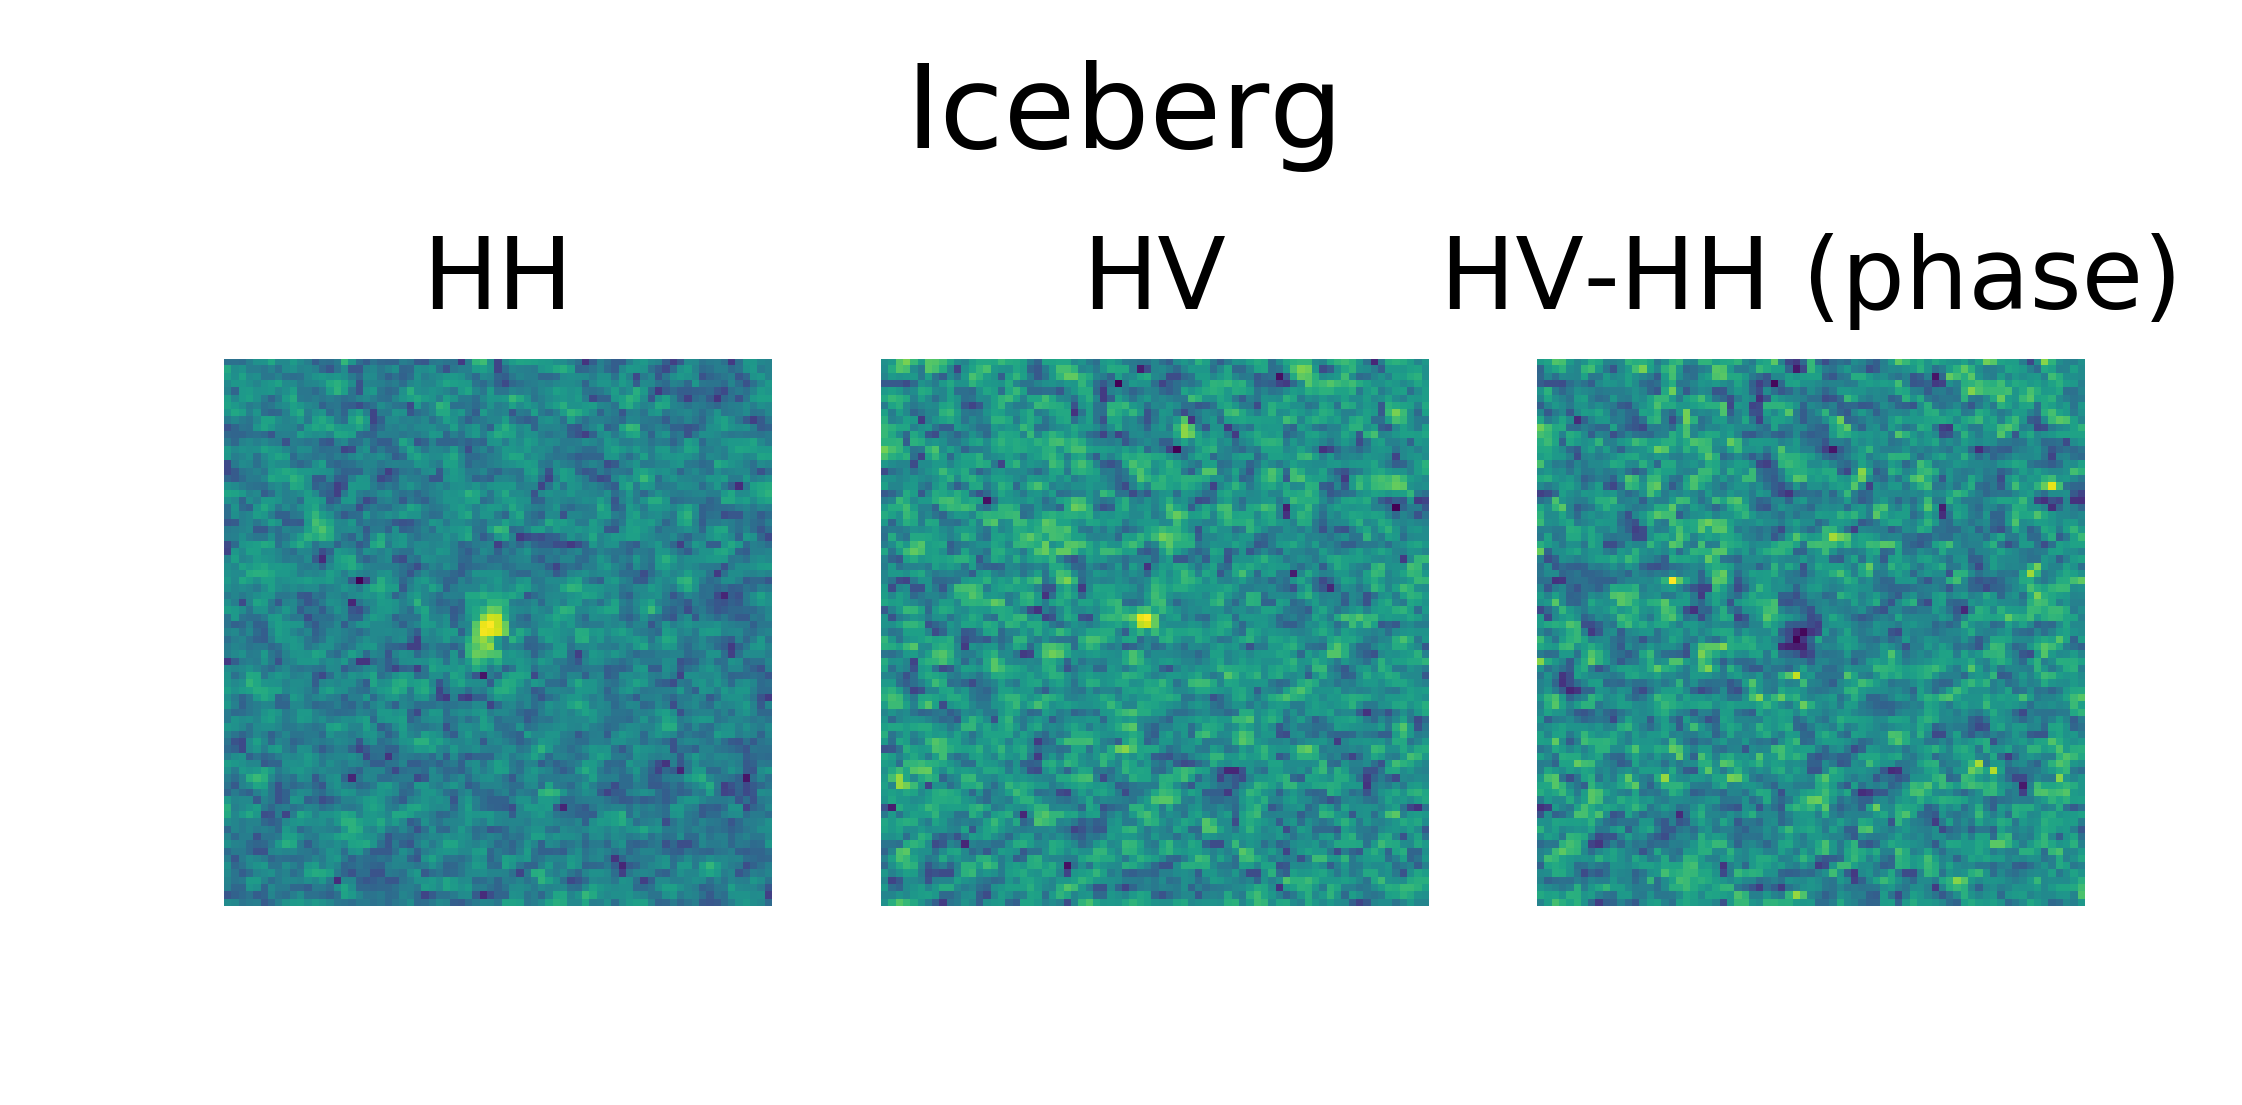

In [20]:
plot_SAR(train,2)

## image filtering

Trying different types of filter to reduce the noise and speckles in the images.

### simple gaussian

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


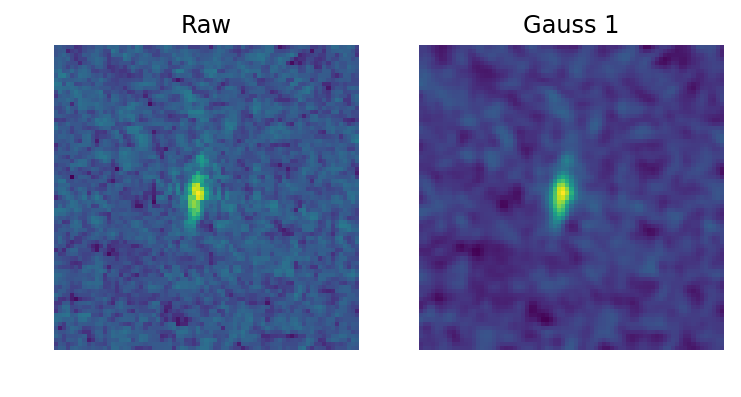

In [21]:
from skimage.filters import gaussian
img = np.array(train['band_1'][0]).reshape(75,75)
dst = gaussian(img,1)
plt.subplot(121),plt.imshow(img),plt.title('Raw'),plt.axis('off')

plt.subplot(122),plt.imshow(dst),plt.title('Gauss 1')
plt.axis('off')
plt.show()

This doesn't help much. Lets try multiple small gaussian filters

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


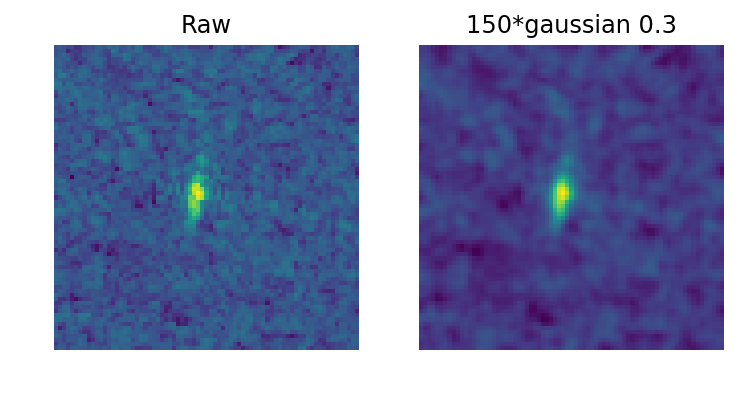

In [22]:
img = np.array(train['band_1'][0]).reshape(75,75)
dst = img
for _ in range(150):
    dst = gaussian(dst,0.3)
plt.subplot(121),plt.imshow(img),plt.title('Raw'),plt.axis('off')

plt.subplot(122),plt.imshow(dst),plt.title('150*gaussian 0.3'),plt.axis('off')

plt.show()

### Lee filter

The Lee filter is a filter typically used in the processing of SAR imaging. [1]

[1] Lee, J.-S. Speckle analysis and smoothing of synthetic aperture radar images. Computer Graphics and Image Processing 17, 24–32 (1981).


In [23]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


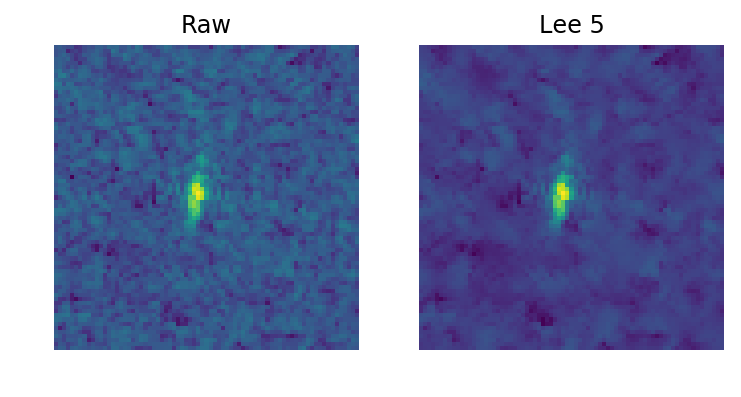

In [24]:
img = np.array(train['band_1'][0]).reshape(75,75)
dst = lee_filter(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Raw'),plt.axis('off')

plt.subplot(122),plt.imshow(dst)
plt.title('Lee 5'),plt.axis('off')

plt.show()

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


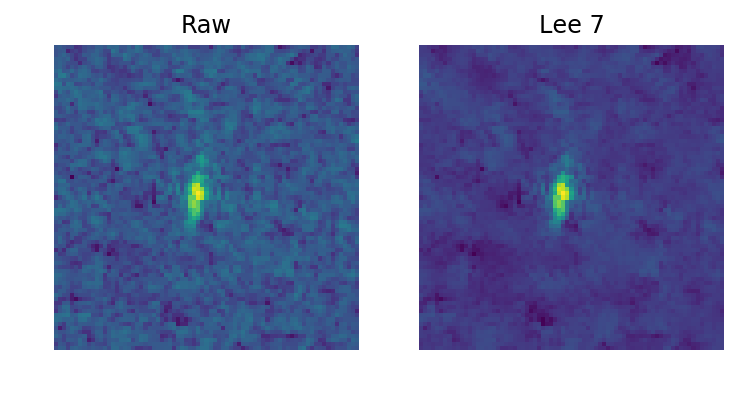

In [25]:
img = np.array(train['band_1'][0]).reshape(75,75)
dst = lee_filter(img,7)
plt.subplot(121),plt.imshow(img),plt.title('Raw'),plt.axis('off')

plt.subplot(122),plt.imshow(dst),plt.title('Lee 7'),plt.axis('off')

plt.show()

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


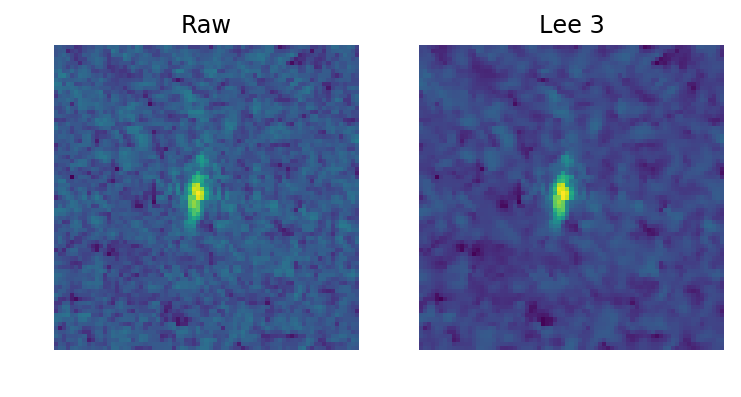

In [26]:
img = np.array(train['band_1'][0]).reshape(75,75)
dst = lee_filter(img,3)
plt.subplot(121),plt.imshow(img),plt.title('Raw'),plt.axis('off')
plt.subplot(122),plt.imshow(dst),plt.title('Lee 3'),plt.axis('off')
plt.show()

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


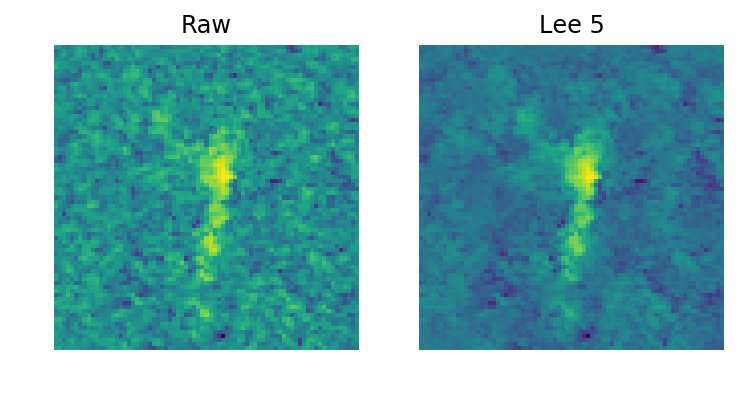

In [27]:
img = np.array(train['band_1'][1000]).reshape(75,75)
dst = lee_filter(img,7)
plt.subplot(121),plt.imshow(img),plt.title('Raw'),plt.axis('off')

plt.subplot(122),plt.imshow(dst),plt.title('Lee 5'),plt.axis('off')

plt.show()

### skimage restauration

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


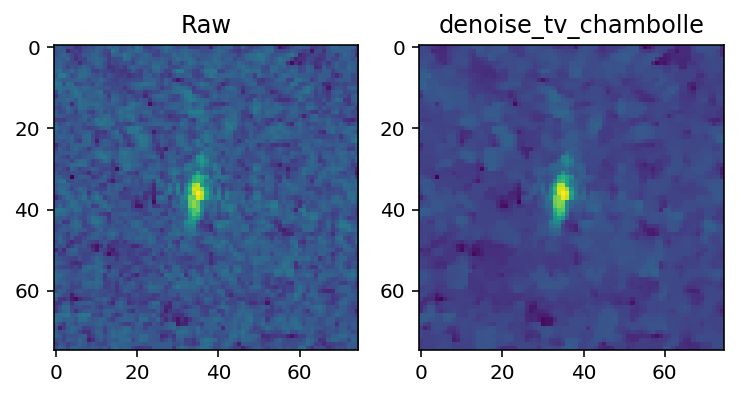

In [28]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral,denoise_wavelet, estimate_sigma

img = np.array(train['band_1'][0]).reshape(75,75)
dst = denoise_tv_chambolle(img, weight=1)
plt.subplot(121),plt.imshow(img),plt.title('Raw')
plt.subplot(122),plt.imshow(dst),plt.title('denoise_tv_chambolle')
plt.show()

### bilateral

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


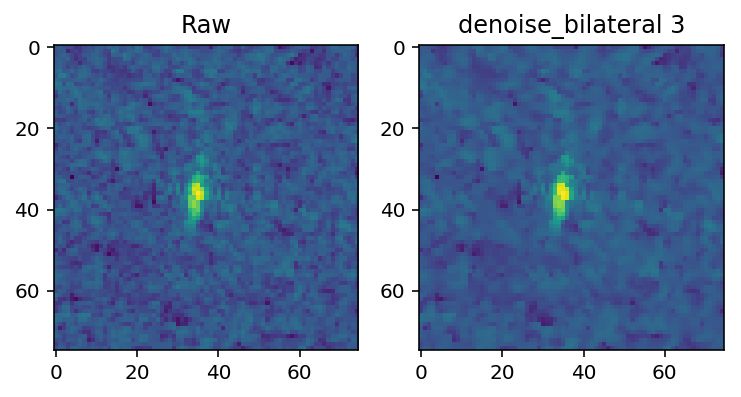

In [29]:
img = np.array(train['band_1'][0]).reshape(75,75)
img = (img-np.min(img))/(np.max(img)-np.min(img))
dst = denoise_bilateral(img,3,multichannel=False)
plt.subplot(121),plt.imshow(img),plt.title('Raw')
plt.subplot(122),plt.imshow(dst),plt.title('denoise_bilateral 3')
plt.show()

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


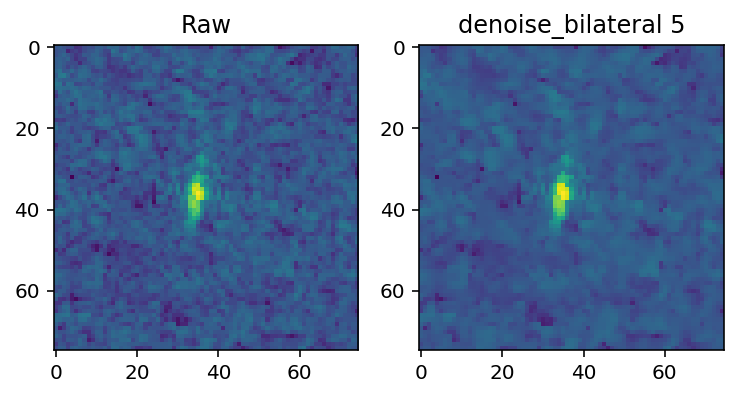

In [30]:
img = np.array(train['band_1'][0]).reshape(75,75)
img = (img-np.min(img))/(np.max(img)-np.min(img))
dst = denoise_bilateral(img,5,multichannel=False)
plt.subplot(121),plt.imshow(img),plt.title('Raw')
plt.subplot(122),plt.imshow(dst),plt.title('denoise_bilateral 5')
plt.show()

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


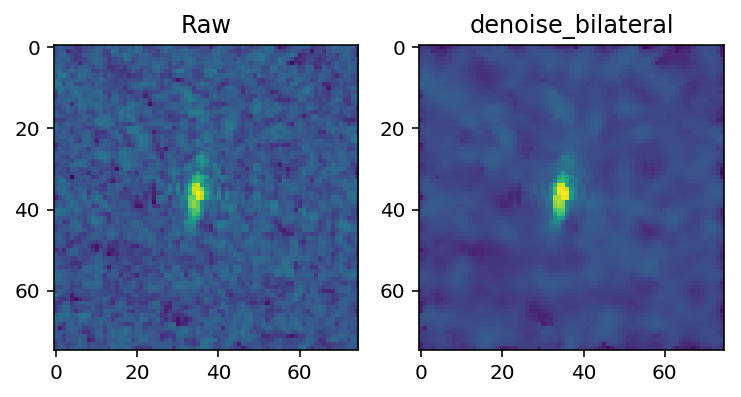

In [31]:
img = np.array(train['band_1'][0]).reshape(75,75)
img = (img-np.min(img))/(np.max(img)-np.min(img))
dst = denoise_bilateral(img,5,multichannel=False,sigma_color=0.15,sigma_spatial=20)
plt.subplot(121),plt.imshow(img),plt.title('Raw')
plt.subplot(122),plt.imshow(dst),plt.title('denoise_bilateral')
plt.show()

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


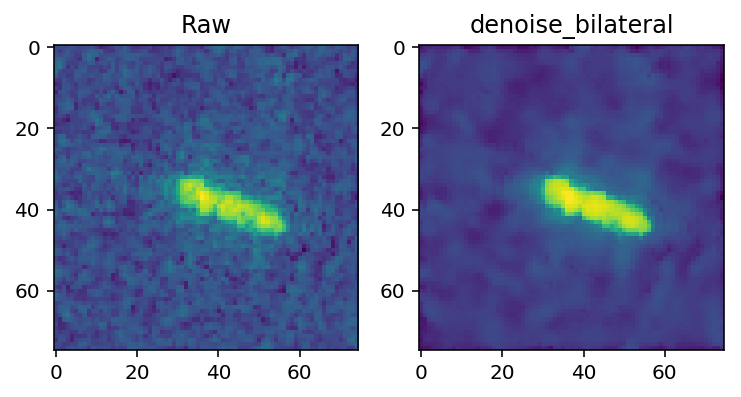

In [32]:
img = np.array(train['band_1'][100]).reshape(75,75)
img = (img-np.min(img))/(np.max(img)-np.min(img))
dst = denoise_bilateral(img,5,multichannel=False,sigma_color=0.15,sigma_spatial=20)
plt.subplot(121),plt.imshow(img),plt.title('Raw')
plt.subplot(122),plt.imshow(dst),plt.title('denoise_bilateral')
plt.show()

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


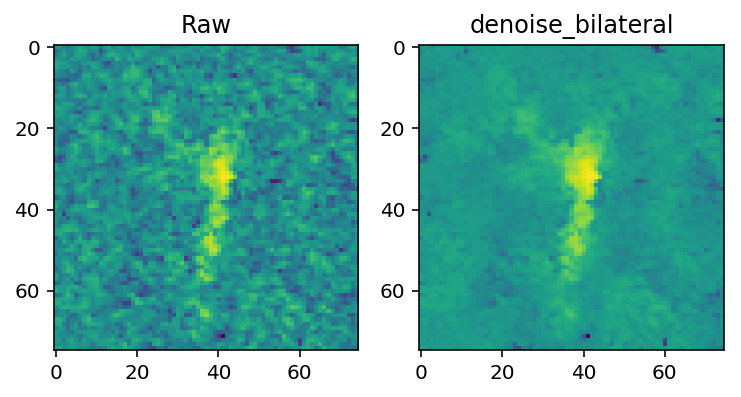

In [33]:
img = np.array(train['band_1'][1000]).reshape(75,75)
img = (img-np.min(img))/(np.max(img)-np.min(img))
dst = denoise_bilateral(img,9,multichannel=False,
                        sigma_color=0.15,sigma_spatial=20)
plt.subplot(121),plt.imshow(img),plt.title('Raw')
plt.subplot(122),plt.imshow(dst),plt.title('denoise_bilateral')
plt.show()

### Non local means

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


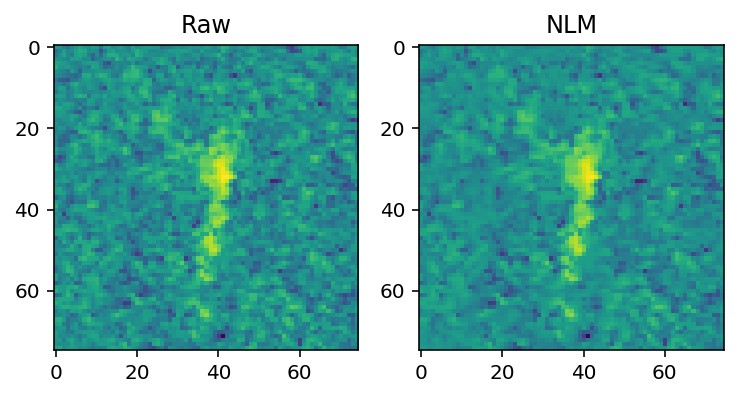

In [34]:
from skimage.restoration import denoise_nl_means, estimate_sigma
noisy = np.array(train['band_1'][1000]).reshape(75,75)

sigma_est = np.mean(estimate_sigma(noisy, multichannel=False))
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=False)
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)


plt.subplot(121),plt.imshow(noisy),plt.title('Raw')
plt.subplot(122),plt.imshow(denoise),plt.title('NLM')
plt.show()



/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


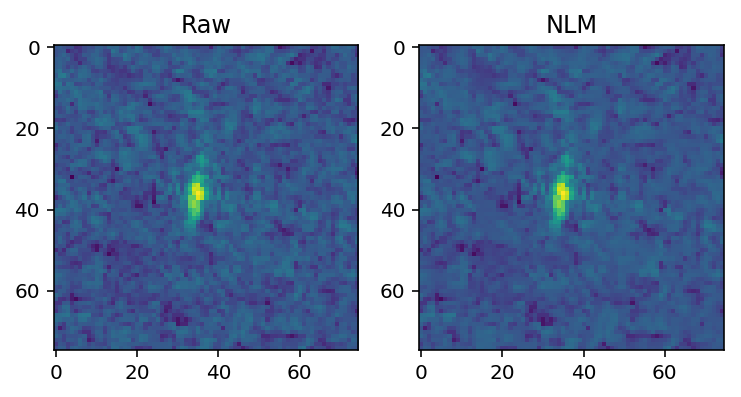

In [35]:
noisy = np.array(train['band_1'][0]).reshape(75,75)

sigma_est = np.mean(estimate_sigma(noisy, multichannel=False))
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=False)
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)


plt.subplot(121),plt.imshow(noisy),plt.title('Raw')
plt.subplot(122),plt.imshow(denoise),plt.title('NLM')
plt.show()


### Guided filter


/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


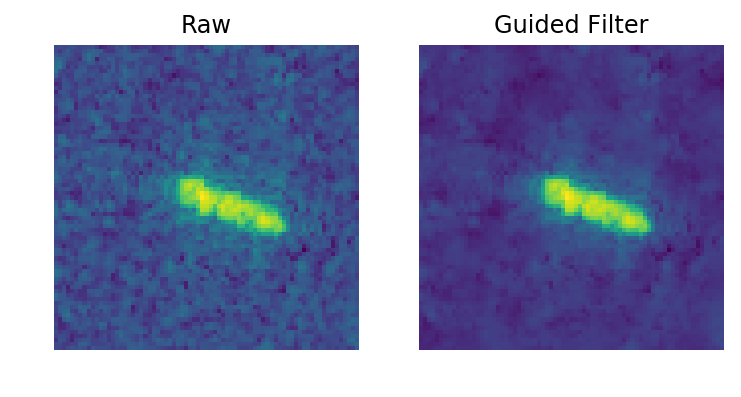

In [37]:
import guidedfilter as gf

noisy = np.reshape(train['band_1'][100],(75,75))
r = 2
eps = 10

denoise = gf.guided_filter(noisy, noisy, r, eps)
plt.subplot(121),plt.imshow(noisy),plt.title('Raw'),plt.axis('off')
plt.subplot(122),plt.imshow(denoise),plt.title('Guided Filter'),plt.axis('off')
plt.show()


/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


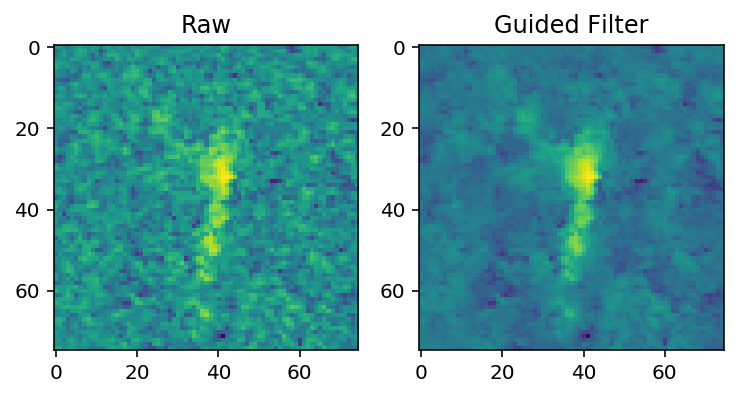

In [38]:
noisy = np.reshape(train['band_1'][1000],(75,75))
r = 2
eps = 10

denoise = gf.guided_filter(noisy, noisy, r, eps)

plt.subplot(121),plt.imshow(noisy),plt.title('Raw')
plt.subplot(122),plt.imshow(denoise),plt.title('Guided Filter')
plt.show()

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


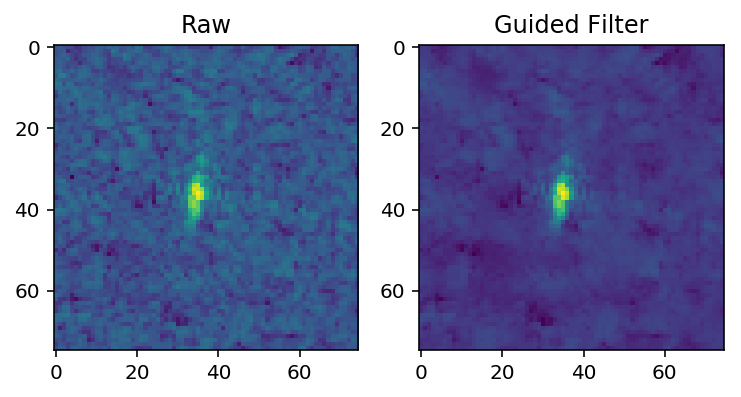

In [39]:
noisy = np.reshape(train['band_1'][0],(75,75))
r = 2
eps = 10

denoise = gf.guided_filter(noisy, noisy, r, eps)

plt.subplot(121),plt.imshow(noisy),plt.title('Raw')
plt.subplot(122),plt.imshow(denoise),plt.title('Guided Filter')
plt.show()

### export figure

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


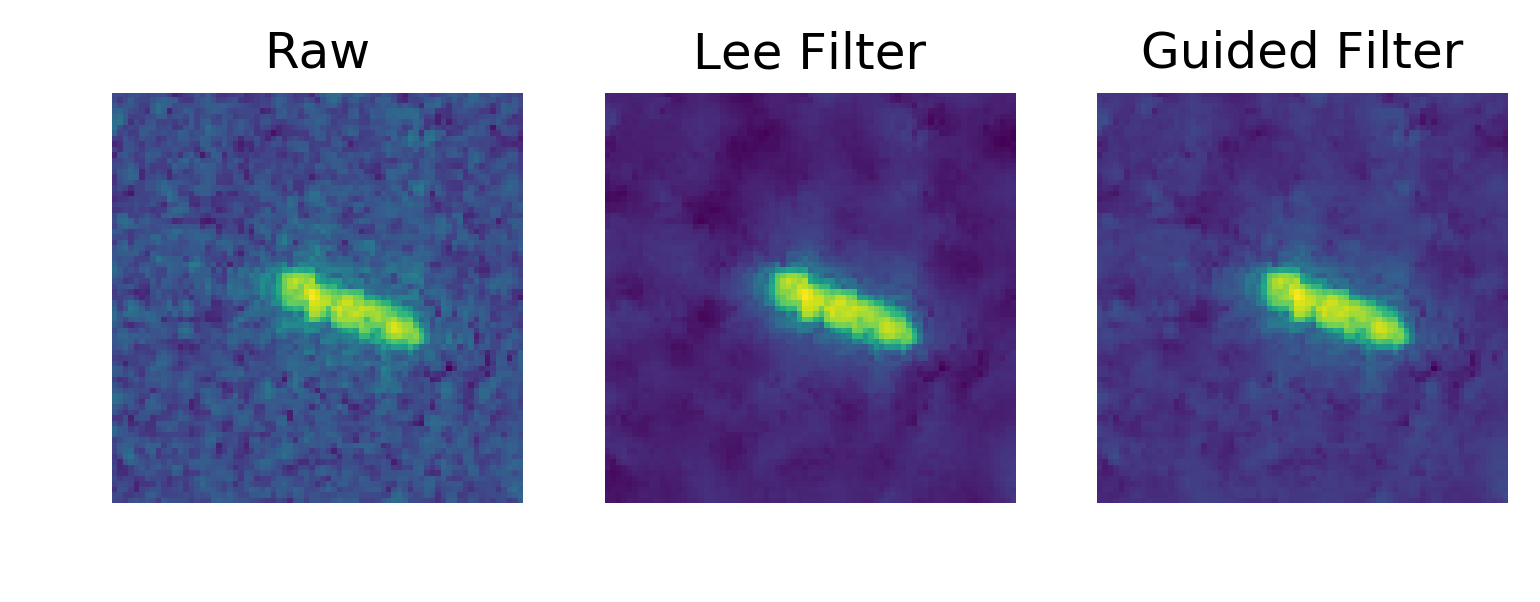

In [40]:
img = np.array(train['band_1'][100]).reshape(75,75)
dst_lee = lee_filter(img,7)
r = 2
eps = 10
dst_gf =gf.guided_filter(img, img, r, eps)

plt.figure(dpi=150)
plt.subplot(131),plt.imshow(img),plt.title('Raw'),plt.axis('off')
plt.subplot(132),plt.imshow(dst_lee),plt.title('Lee Filter'),plt.axis('off')
plt.subplot(133),plt.imshow(dst_gf),plt.title('Guided Filter'),plt.axis('off')

plt.show()

## adding a 3rd channel

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


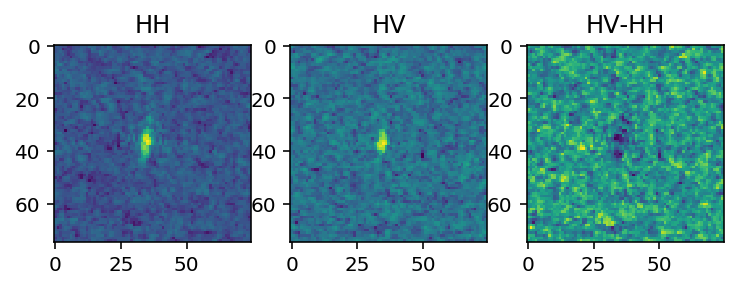

ship
Cross-Pol-Phase


In [41]:
instance = 0
band_1 = np.reshape(train['band_1'][instance],(75,75))
band_2 = np.reshape(train['band_2'][instance],(75,75))
band_3 = np.reshape(train['band_2'][instance],(75,75)) - np.reshape(train['band_1'][0],(75,75))
denoise = gf.guided_filter(noisy, noisy, r, eps)

plt.subplot(131),plt.imshow(band_1),plt.title('HH')
plt.subplot(132),plt.imshow(band_2),plt.title('HV')
plt.subplot(133),plt.imshow(band_3),plt.title('HV-HH')

plt.show()
print('iceberg' if train['is_iceberg'][instance] else 'ship')
print('Cross-Pol-Phase')

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


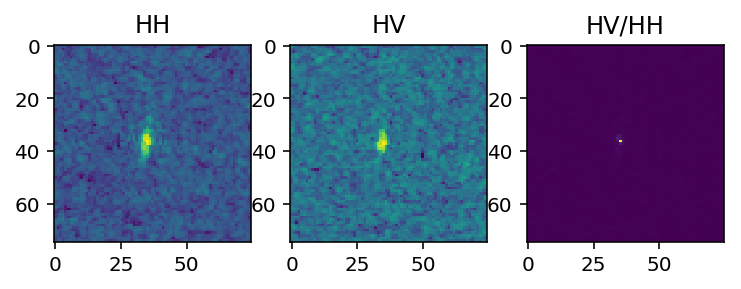

ship


In [42]:
instance = 0
band_1 = np.reshape(train['band_1'][instance],(75,75))
band_2 = np.reshape(train['band_2'][instance],(75,75))
band_3 = np.reshape(train['band_2'][instance],(75,75)) / np.reshape(train['band_1'][0],(75,75))
denoise = gf.guided_filter(noisy, noisy, r, eps)

plt.subplot(131),plt.imshow(band_1),plt.title('HH')
plt.subplot(132),plt.imshow(band_2),plt.title('HV')
plt.subplot(133),plt.imshow(band_3),plt.title('HV/HH')

plt.show()
print('iceberg' if train['is_iceberg'][instance] else 'ship')


## pixel importance with random forest

We can train a random forest classifier to determine which pixels mainly influence the label. This will help to determine how much we can shave on the sides for data augmentation.

- prepare the data for scikit-learn model (i.e. as a flattened matrix)

In [43]:
y=train['is_iceberg']

b1=np.vstack(train['band_1'])
b2=np.vstack(train['band_2'])

X = np.hstack([b1,b2])
print (f'The training data as a flattened array has the shape {X.shape}.')

The training data as a flattened array has the shape (1604, 11250).


- Add the `inc_angle` feature.

In [44]:
X = np.hstack([X,train['inc_angle'].values.reshape(1604,1)])

- train the Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rnd_for_cls = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
rnd_for_cls.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
feature_map=rnd_for_cls.feature_importances_



In [73]:
b1_importance=feature_map[:int((len(feature_map)-1)/2)]
b2_importance=feature_map[int((len(feature_map)-1)/2):len(feature_map)-1]
inc_angle_importance=feature_map[len(feature_map)-1]

/home/ckrull/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


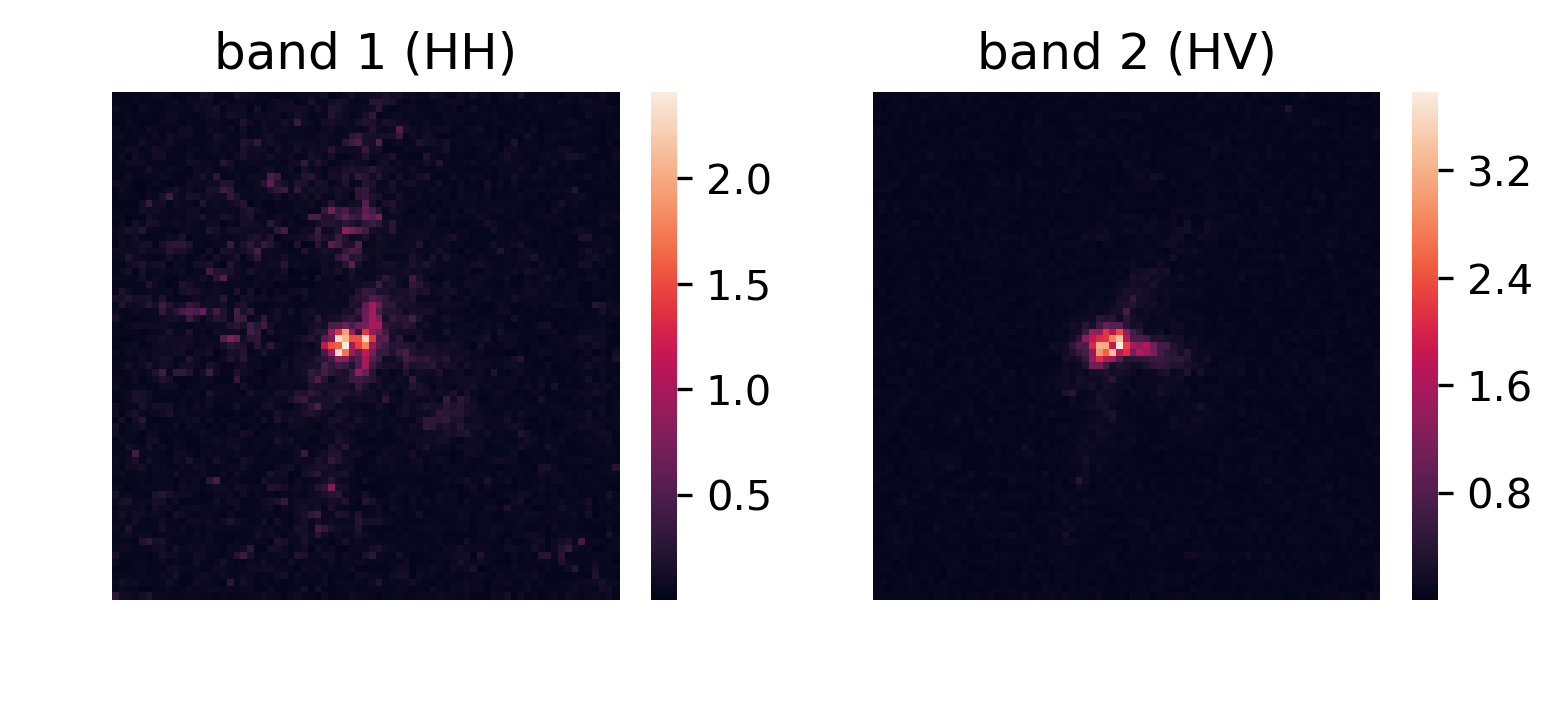

In [74]:
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib.colors import LogNorm
%config InlineBackend.figure_format = 'retina'

font = {'family':'normal',
       'weight':'normal',
       'size':10}
import matplotlib
matplotlib.rc('font', **font)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0.1, hspace=0.5)
plt.figure(dpi=150)
plt.axis('off')
ax=plt.subplot(1, 2, 1)
sns.heatmap(b1_importance.reshape(75,75),square=True,cbar_kws={"shrink": .56})
plt.axis('off')
plt.title('band 1 (HH)')
ax=plt.subplot(1, 2, 2)
sns.heatmap(b2_importance.reshape(75,75),square=True,cbar_kws={"shrink": .56})
plt.title('band 2 (HV)')
plt.axis('off')


In [ ]:
print( f'The "inc_angle" has an importance of : {inc_angle_importance}')

- The data is well centred 
- it should be possible to apply extensive data augmentation
- it appears the `inc_angle` is not so relevant. It importance is comparable to the pixel corresponding to ocean far away from the iceberg and ship (i.e. the centre of the map)



### Pixel importance with filtered data
We trained the Random forest using the non- normalized data. While this should not affect a rand forest. We will try again with filtered and normalized data

In [ ]:
import gf

def filter_band(data):
    noisy=data.reshape(75,75)
    r = 2
    eps = 10
    denoise = gf.guided_filter(noisy, noisy, r, eps)
    return denoise.ravel()

In [ ]:
b1_filt=np.apply_along_axis(filter_band,1,b1)
b2_filt=np.apply_along_axis(filter_band,1,b2)

In [ ]:
X_filt = np.hstack([b1_filt,b2_filt])
X_filt = np.hstack([X_filt,train['inc_angle'].values.reshape(1604,1)])

In [ ]:
rnd_for_cls_filt = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
rnd_for_cls_filt.fit(X_filt,y)

In [ ]:
feature_map=rnd_for_cls_filt.feature_importances_
b1_importance=feature_map[:int((len(feature_map))-1/2)]
b2_importance=feature_map[int((len(feature_map)-1)/2):]
inc_angle_importance=feature_map[len(feature_map)-1]

In [ ]:
from matplotlib.colors import LogNorm
%config InlineBackend.figure_format = 'retina'

font = {'family':'normal',
       'weight':'normal',
       'size':10}
import matplotlib
matplotlib.rc('font', **font)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0.1, hspace=0.5)
plt.figure(dpi=150)
plt.axis('off')
ax=plt.subplot(1, 2, 1)
sns.heatmap(b1_import.reshape(75,75),square=True,cbar_kws={"shrink": .56})
plt.axis('off')
plt.title('band 1 (HH)')
ax=plt.subplot(1, 2, 2)
sns.heatmap(b2_import.reshape(75,75),square=True,cbar_kws={"shrink": .56})
plt.title('band 2 (HV)')
plt.axis('off')

In [ ]:
print( f'The "inc_angle" has an importance of : {inc_angle_importance}')

**The incidence angle become more important after applying the filtering. **